# Comparison of Heart Disease Classifiers

## Authors: Rayhaan Rasheed, Solomon Mekonnen, Sam Aboagye

### Data: 
The data used in this project is the Heart Disease Dataset generated by Robert Detrano, M.D., Ph.D. at the V.A. Medical Center, Long Beach and Cleveland Clinic Foundation. The full database was pulled from the Machine Learning Repository created by the University of California Irvine.

There are 76 attributes in total, but the literature prefers using only 14 of them:
1.  Age
2.  Sex
3.  Chest Pain Rating
4.  Resting Blood Pressure
5.  Serum Cholestoral in mg/dl
6.  Blood Sugar Level While Fasting 
7.  Resting EKG
8.  Maximum Heart Rate Achieved
9.  Exercise Induced Angina
10. ST Depression Induced by Exercise Relative to Rest
11. Slope of the Peak Exercise ST Segment 
12. Number of Major Vessels Colored by Flourosopy 
13. Normal, Fixed Defect, or Reversable Defect
14. Class(target) 

### Overview:
This project aims to evaluate and compare different classifers using the Heart Disease database. Instead on turning this into a multi-class classification problem, the target values will be changed to either 0 or 1. Any target value that has a value greater or equal to 1 will be a 1 in the new target column; likewise, anything with a 0 will stay 0. The reason for this is to focus on the fundamental issue of whether a patient qualifies for having any sign or heart disease (OnevsAll) 

The classifier used:
* Logistic Regression
* Random Forest
* Support Vector Machine

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
features = ["age", "sex", "cp", "trestbps",
            "chol", "fbs", "restecg", "thalach",
            "exang","oldpeak", "slope", "ca", "thal", "target"]
      
df = pd.read_csv(url, header = None, names=features)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Preprocessing and Data Analysis:
* EDA
* Encode the ordinal data
* Separate features and target
* Split into test and train 
* Build simple logistic regression as our base

In [4]:
import numpy as np

print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df = df.replace('?',np.NaN)

# Remove rows with np.NaN
df = df.dropna()

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 303
Number of rows after removing rows with missing values: 297


In [5]:
cont_features = ['oldpeak','sex','chol','thalach']
df_0 = df[df.target == 0]
df_1 = df[df.target == 1]
df_2 = df[df.target == 2]
df_3 = df[df.target == 3]
df_4 = df[df.target == 4]

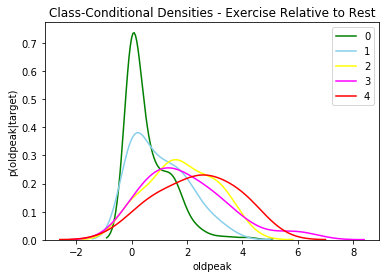

In [6]:
sns.distplot( df_0["oldpeak"] , color="green", label="0", hist=False)
sns.distplot( df_1["oldpeak"] , color="skyblue", label="1",hist=False)
sns.distplot( df_2["oldpeak"] , color="yellow", label="2",hist=False)
sns.distplot( df_3["oldpeak"] , color="magenta", label="3",hist=False)
sns.distplot( df_4["oldpeak"] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Exercise Relative to Rest")
plt.ylabel("p(oldpeak|target)")
plt.show()

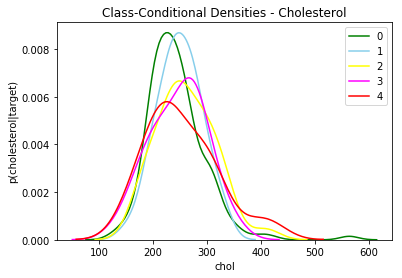

In [7]:
sns.distplot( df_0['chol'] , color="green", label="0", hist=False)
sns.distplot( df_1['chol'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['chol'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['chol'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['chol'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Cholesterol")
plt.ylabel("p(cholesterol|target)")
plt.show()

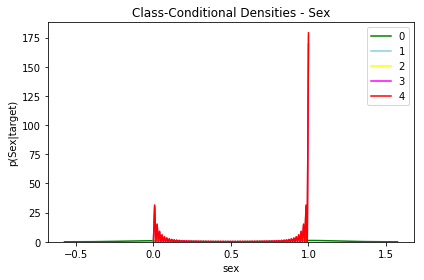

In [8]:
sns.distplot( df_0['sex'] , color="green", label="0", hist=False)
sns.distplot( df_1['sex'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['sex'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['sex'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['sex'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Sex")
plt.ylabel("p(Sex|target)")
plt.tight_layout()
plt.show()

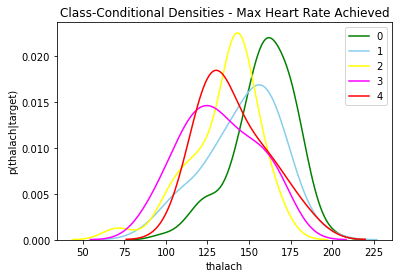

In [9]:
sns.distplot( df_0['thalach'] , color="green", label="0", hist=False)
sns.distplot( df_1['thalach'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['thalach'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['thalach'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['thalach'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Max Heart Rate Achieved")
plt.ylabel("p(thalach|target)")
plt.show()

#### Relabel Classes
* We want to turn the cassifier into a dichotomizer (binary) 
* OvA probelem focusing on class 0 in target

In [10]:
target = []
for i in df['target']:
    if i == 0:
        target.append(0)
    else:
        target.append(1)

y = pd.Series(target)       

# Specify the name of the features
features = list(df.drop('target', axis=1).columns)

# Get the feature vector
X = df[features]

#### Split Data & Standardize

In [11]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set randome_state as 0 and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler

# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data

X_test = std_scaler.transform(X_test)

<break>

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
# Delcare the model
lr = LogisticRegression()
# Train the model
lr.fit(X_train, y_train)
# Print the accuracy
print('The accuracy of the logistic classifier is: ' + str(lr.score(X_test, y_test)))

The accuracy of the logistic classifier is: 0.8222222222222222


<break>

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
# Delcare the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
# Train the model
rf.fit(X_train,y_train)
# Print the classification accuracy
print('The accuracy of random forest is: ' + str(rf.score(X_test, y_test)))

The accuracy of random forest is: 0.7777777777777778


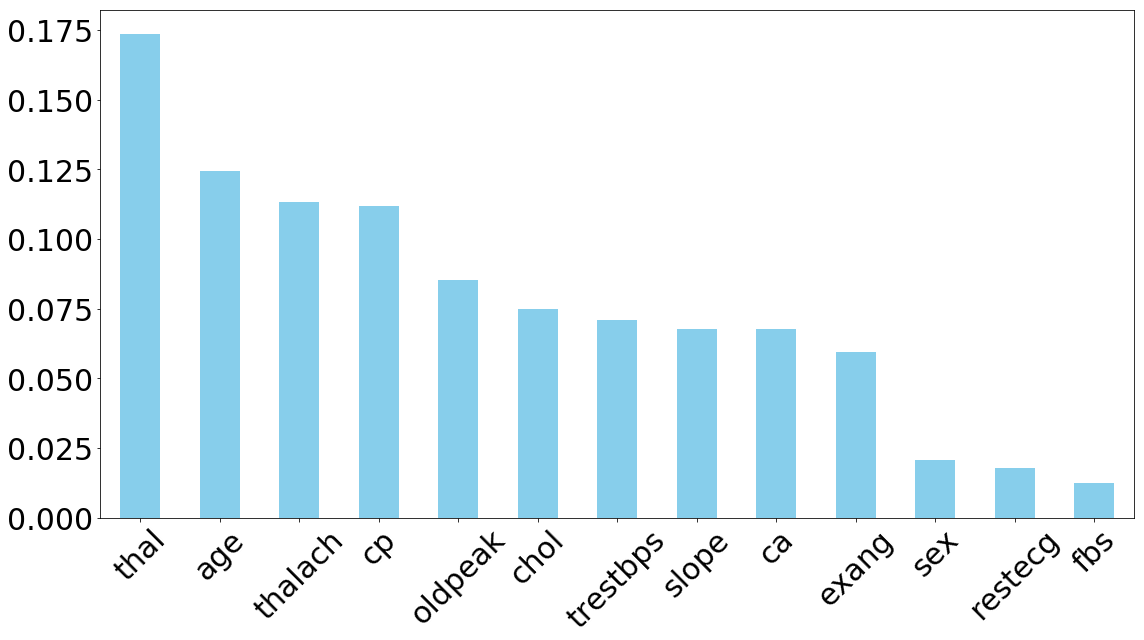

In [16]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = f_importances = pd.Series(rf.feature_importances_, features)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30,color='skyblue')

# Show the plot
plt.tight_layout()
plt.show()

##### Top 4 Features
* Thal: HR type
* Age: Age of subject
* Thalach: Maximum heart rate achieved
* Cp: Chest Pain Type

<break>

## Support Vector Machine (SVM)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# The list of value for hyperparameter C (penalty parameter)
Cs = [0.01, 0.1, 1, 10]

# The list of choice for hyperparameter kernel
kernels = ['linear', 'rbf', 'sigmoid']

# The list of [score, setting], where score is the score of the classifier and setting a pair of (C, kernel)
score_settings = []

# For each C
for C in Cs:
    # For each kernel
    for kernel in kernels:
        # Declare the classifier with hyperparameter C, kernel, class_weight, and random_state
        clf = SVC(C=C, kernel=kernel, class_weight='balanced', random_state=0)
        
        # The pipeline, with StandardScaler and clf defined above
        pipe_clf = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
        
        # Get the score with respect to each fold (using cross_val_score)
        scores = cross_val_score(estimator=pipe_clf,
                                 X=X,
                                 y=y,
                                 scoring='accuracy',
                                 cv=StratifiedKFold(n_splits=10,
                                                    shuffle=True,
                                                    random_state=0),
                                 n_jobs=-1)
        
        # Get the setting, which is a pair of (C, kernel)
        setting = [C, kernel]
        
        # Get the average score (rounding to two decimal places)
        mean_score = round(np.mean(scores), 2)

        # Append [mean_score, setting] to score_settings
        score_settings.append([mean_score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('C: ' + str(score_settings[0][1][0]))
print('kernel: ' + score_settings[0][1][1])

The list of [score, setting] is:
[0.85, [0.01, 'linear']]
[0.84, [0.1, 'linear']]
[0.84, [0.1, 'sigmoid']]
[0.84, [1, 'sigmoid']]
[0.83, [1, 'linear']]
[0.82, [1, 'rbf']]
[0.82, [10, 'linear']]
[0.81, [10, 'sigmoid']]
[0.8, [0.1, 'rbf']]
[0.8, [10, 'rbf']]
[0.78, [0.01, 'sigmoid']]
[0.49, [0.01, 'rbf']]

The best setting is:
C: 0.01
kernel: linear


In [36]:
svm = SVC(C=0.01, kernel='linear', class_weight='balanced', random_state=0)
svm.fit(X_train, y_train)
print('The accuracy of Support Vector Machine is: ' + str(svm.score(X_test, y_test)))

The accuracy of Support Vector Machine is: 0.8333333333333334


<break>

## Model Evaluation
* Confusion Matrix
* Precision Score
* F1-score
* ROC Curve w/ AUC

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [20]:
### CONFUSION MATRIX PLOT FUNCTION ###
def conf_plot(confmat):
    fig, ax = plt.subplots(figsize=(2.5,2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

In [37]:
## RECIEVER OPERATING CURVE ##
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_auc(name, y_pred, color):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, color=color, marker ='.', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: '+str(name))
    plt.legend(loc="lower right")
    plt.show()

### Logistic Regression

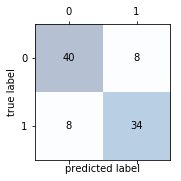

F1: 0.810


In [38]:
y_predict_lr = lr.predict(X_test)
confmat_lr = confusion_matrix(y_true = y_test, y_pred=y_predict_lr)
conf_plot(confmat_lr)
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_predict_lr))

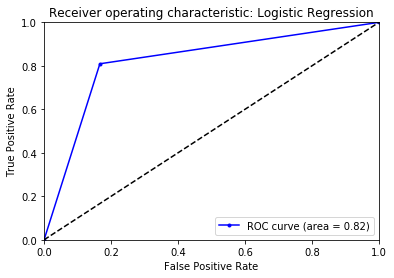

In [39]:
plot_roc_auc('Logistic Regression', y_predict_lr, color='blue')

### Random Forest

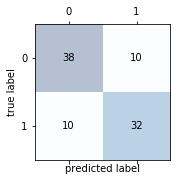

F1: 0.762


In [27]:
y_predict_rf = rf.predict(X_test)
confmat_rf = confusion_matrix(y_true = y_test, y_pred=y_predict_rf)
conf_plot(confmat_rf)
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_predict_rf))

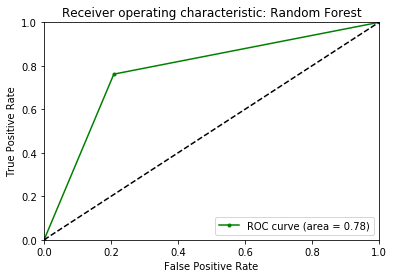

In [28]:
plot_roc_auc('Random Forest', y_predict_rf, color='green')

### Support Vector Machine

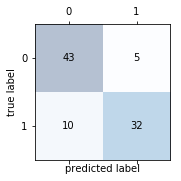

F1: 0.810


In [29]:
y_predict_svm = svm.predict(X_test)
confmat_svm = confusion_matrix(y_true = y_test, y_pred=y_predict_svm)
conf_plot(confmat_svm)
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_predict_svm))

<break>

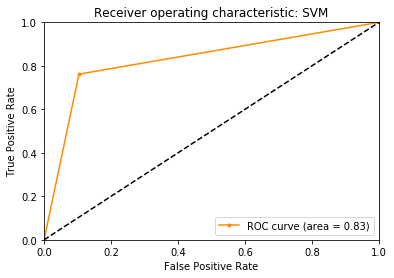

In [30]:
plot_roc_auc('SVM',y_predict_svm,'darkorange')